In [235]:
import pandas as pd
import matplotlib.pylab as plt


In [236]:
df_train = pd.read_csv('./train.csv', )
df = df_train.copy()

In [237]:
df
#Pclass Sex Age Fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [245]:
df = df.assign(Survived = df_survivor.Survived.tolist())

In [246]:
def sort_maker(dataframe,column_name):
    result_data = dataframe.sort_values(column_name)[column_name].to_frame().reset_index()
    del result_data['index']
    return result_data


In [247]:
age_df = df.Age.fillna(0)

<AxesSubplot:>

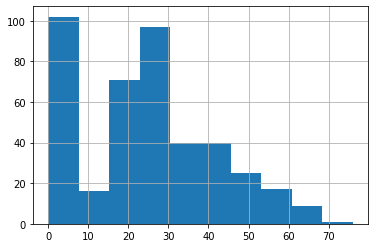

In [248]:
age_df.hist()

In [283]:
def get_hist(df, max_range = 20, length = 5):
    all_ans = []
    for j in range(0,max_range):   
        ans = []
        for index , i in enumerate(df.between(length*j, length*(j+1)).tolist()):
            if i is True:
                ans.append(i)
        all_ans.append(ans)
    new_hist = []
    for i in all_ans:
        new_hist.append(len(i))
    return new_hist

In [299]:
def plot_hist(survived_pass, all_pass):
    res_of_hist = []
    for i in range(0,len(all_pass)):
        if(all_pass[i] != 0):
            res_of_hist.append(survived_pass[i] / all_pass[i])
        else:
            res_of_hist.append(0)
    pd.DataFrame(res_of_hist).plot.bar()

In [300]:
def get_hist_p(df):
    res = []
    for i in range(1,4):
        res.append(df.tolist().count(i))
    return res

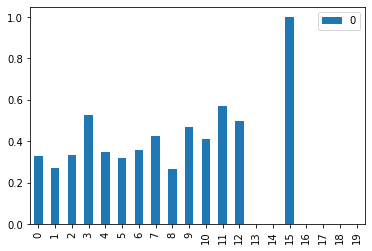

In [301]:
plot_hist(get_hist(df.loc[df.Survived == 1].Age.fillna(0)), get_hist(age_df))

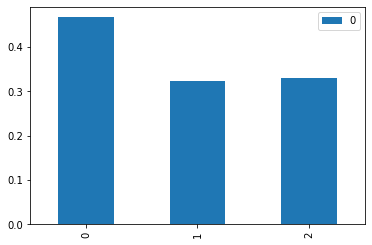

In [302]:
plot_hist(get_hist_p(df.loc[df.Survived == 1].Pclass),get_hist_p(df.Pclass) )

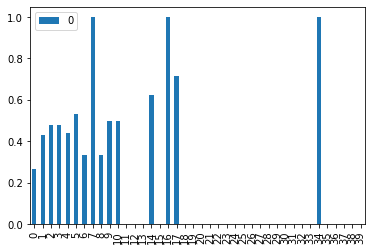

In [303]:
plot_hist(get_hist(df.loc[df.Survived == 1].Fare,40,15),get_hist(df.Fare,40,15) )

In [325]:
df.loc[(df.Sex == "male") & (df.Survived == 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


0.6363636363636364

In [115]:
def plotter(dataframe):
    dataframe.plot(subplots=True, layout=(1,1))

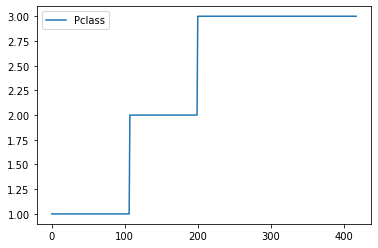

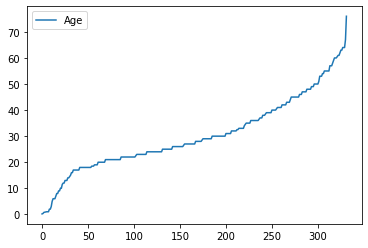

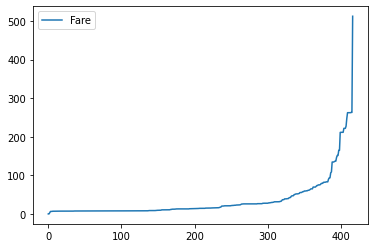

In [116]:
sources = ["Pclass", "Age", "Fare"]
res = [plotter(sort_maker(df,src)) for src in sources]

In [134]:
df_survivor = pd.read_csv('./gender_submission.csv', )

In [135]:
df_survivor

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [155]:
df_survivor.set_index("PassengerId").Survived.tolist().count(0)

266

In [156]:
df_survivor.set_index("PassengerId").Survived.tolist().count(1)

152

In [329]:
df_train = pd.read_csv('./train.csv', )

df = df_train.copy()
df.loc[(df.Sex == "male") & (df.Survived == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
